In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import glob


In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [34]:
TRAIN_IMAGE_PATH = "/content/data/MyDrive/ColabNotebooks/CapstoneProject/Car Images/Train Images"
TEST_IMAGE_PATH = "/content/data/MyDrive/ColabNotebooks/CapstoneProject/Car Images/Test Images"

In [4]:
df_train_annotations=pd.read_csv('/content/data/MyDrive/ColabNotebooks/CapstoneProject/Annotations/Train Annotations.csv')
df_test_annotations=pd.read_csv('/content/data/MyDrive/ColabNotebooks/CapstoneProject/Annotations/Test Annotation.csv')

In [5]:
df_train_annotations.head()

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


The bounding box coordinates are not clearly labelled. It could be either in (xmin, ymin, xmax, ymax) format or (x, y, width, height) format. First, I will assume that the coordinates are in (xmin, ymin, xmax, ymax) format and change the columns names accordingly.

In [43]:
def rename_columns(annotation_data):
  annotation_data.rename(columns = {'Bounding Box coordinates':'xmin'}, inplace = True)
  annotation_data.rename(columns = {'Unnamed: 2':'ymin'}, inplace = True)
  annotation_data.rename(columns = {'Unnamed: 3':'xmax'}, inplace = True)
  annotation_data.rename(columns = {'Unnamed: 4':'ymax'}, inplace = True)
  annotation_data.rename(columns = {'Image class':'class'}, inplace = True)
  annotation_data.rename(columns = {'Image Name':'name'}, inplace = True)
  return annotation_data

In [44]:
# Changing column names of train and test annotations
df_train_annotations = rename_columns(df_train_annotations)
df_test_annotations = rename_columns(df_test_annotations)

In [133]:
# Method to verify the whether the bounding box coordinates are fitting correctly
def show_image_with_bounding_box(image_name):
  image_path = glob.glob(TRAIN_IMAGE_PATH+"/**/"+image_name, recursive = True)
  annotation = df_train_annotations[df_train_annotations["name"] == image_name]

  #Set bounding box coordinates as tuple
  start_point = (annotation.xmin, annotation.ymin) 
  end_point = (annotation.xmax, annotation.ymax)

  # Blue color in BGR 
  color = (255, 0, 0) 
    
  # Line thickness of 2 px 
  thickness = 1
  
  #read image using cv2
  image = cv2.imread(image_path[0])

  # Using cv2.rectangle() method 
  # Draw a rectangle with blue line borders of thickness of 2 px 
  image = cv2.rectangle(image, start_point, end_point, color, thickness)

  #Show the image with matplotlib
  plt.imshow(image)
  plt.show()

The below sample images confirm that the bounding box coordinates are in (xmin, ymin, xmax, ymax) format

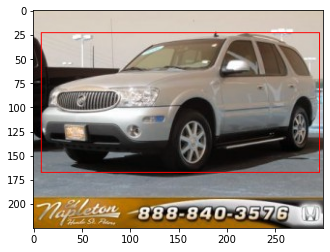

In [134]:
# Sample train image with bounding box
show_image_with_bounding_box("00487.jpg")

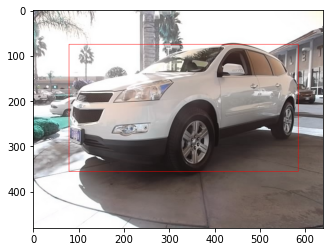

In [135]:
# Sample train image with bounding box
show_image_with_bounding_box("00999.jpg")